2023-07-06 18:43:48.481202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 18:43:48.484060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 18:43:48.486804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 364ms/step


2023-07-06 18:43:51.674983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-06 18:43:51.676651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-06 18:43:51.678390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

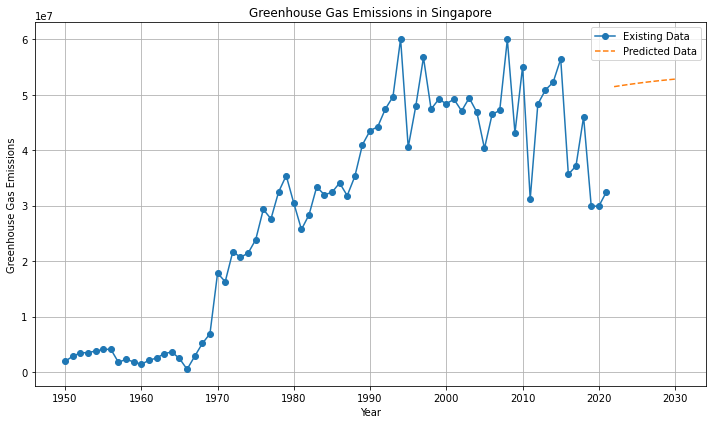

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Existing data
years = np.array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
                  1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
                  1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
emissions = np.array([1913932, 2825777, 3441306, 3481713, 3771295, 4052795, 4095894.8, 1729408, 2297328, 1799024, 1392320, 2092144,
                      2513415, 3301367, 3601712, 2425568, 478923, 2821280, 5133455, 6888320, 17832688, 16275421, 21720192, 20690608,
                      21427072, 23863632, 29337648, 27611904, 32463040, 35419820, 30433184, 25706624, 28381510, 33397362, 31968554,
                      32397088, 34100850, 31810848, 35280656, 41003824, 43535576, 44235470, 47441470, 49661856, 60085936, 40545824,
                      48012940, 56737040, 47412160, 49200190, 48394110, 49200212, 47093390, 49438350, 46858896, 40322320, 46470510,
                      47184990, 59990670, 43128944, 55066256, 31206288, 48328160, 50881970, 52252304, 56465904, 35654384, 37156624,
                      46019840, 29916560, 29909494, 32506890])

# Prepare training data
X = years.reshape(-1, 1)
Y = emissions.reshape(-1, 1)

# Normalize data
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()
X = (X - X_mean) / X_std
Y = (Y - Y_mean) / Y_std

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=100, verbose=0)

# Generate predictions for future years
future_years = np.arange(2022, 2031)
future_data = (future_years.reshape(-1, 1) - X_mean) / X_std
future_predictions = model.predict(future_data)
future_predictions = future_predictions.flatten() * Y_std + Y_mean

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, emissions, 'o-', label='Existing Data')
plt.plot(future_years, future_predictions, '--', label='Predicted Data')
plt.xlabel('Year')
plt.ylabel('Greenhouse Gas Emissions')
plt.title('Greenhouse Gas Emissions in Singapore')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
